## Document Similarity Measures
#### Text similarity is used to discover the most similar texts. It is used to discover similar documents using various measures such as Jaccard and Cosine similarity
#### Document similarity can be used in any search engines such as Google. Text similarity can also be used in document recommendations. 
There are many ways of matching the similarity between texts
1. FuzzyWuzzy 
2. Cosine Similarity 
3. Jaccard Similarity

### 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import gensim
import nltk
import string
import re

C:\Users\ADMIN\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### 2. Reading the two text files
###### Open returns a file object, which has methods and attributes for getting information about and manipulating the opened file.

In [2]:
# Reading the file text file
with open('doc1.txt', 'r') as file:
    data1 = file.read().replace('\n',' ')
data1[:2000]

"Quantum mechanics is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles.[2]:â€Š1.1â€Š It is the foundation of all quantum physics including quantum chemistry, quantum field theory, quantum technology, and quantum information science.  Classical physics, the collection of theories that existed before the advent of quantum mechanics, describes many aspects of nature at an ordinary (macroscopic) scale, but is not sufficient for describing them at small (atomic and subatomic) scales. Most theories in classical physics can be derived from quantum mechanics as an approximation valid at large (macroscopic) scale.[3]  Quantum mechanics differs from classical physics in that energy, momentum, angular momentum, and other quantities of a bound system are restricted to discrete values (quantization), objects have characteristics of both particles and waves (wave-particle duality), and there are limits to h

In [3]:
# Reading the second text file
with open('doc2.txt','r') as file:
    data2=file.read().replace('\n',' ')
data2[:2000]

'quantum mechanics, science dealing with the behaviour of matter and light on the atomic and subatomic scale. It attempts to describe and account for the properties of molecules and atoms and their constituentsâ€”electrons, protons, neutrons, and other more esoteric particles such as quarks and gluons. These properties include the interactions of the particles with one another and with electromagnetic radiation (i.e., light, X-rays, and gamma rays).  The behaviour of matter and radiation on the atomic scale often seems peculiar, and the consequences of quantum theory are accordingly difficult to understand and to believe. Its concepts frequently conflict with common-sense notions derived from observations of the everyday world. There is no reason, however, why the behaviour of the atomic world should conform to that of the familiar, large-scale world. It is important to realize that quantum mechanics is a branch of physics and that the business of physics is to describe and account for

### 3. Cleaning the data
###### We remove all the unwanted text and special characters from the string so that it does not affect the similarity between two documents

In [5]:
data1_cleaned=re.sub('[\W_]+'," ",data1)
data1_cleaned[:2000]

'Quantum mechanics is a fundamental theory in physics that provides a description of the physical properties of nature at the scale of atoms and subatomic particles 2 â Š1 1â Š It is the foundation of all quantum physics including quantum chemistry quantum field theory quantum technology and quantum information science Classical physics the collection of theories that existed before the advent of quantum mechanics describes many aspects of nature at an ordinary macroscopic scale but is not sufficient for describing them at small atomic and subatomic scales Most theories in classical physics can be derived from quantum mechanics as an approximation valid at large macroscopic scale 3 Quantum mechanics differs from classical physics in that energy momentum angular momentum and other quantities of a bound system are restricted to discrete values quantization objects have characteristics of both particles and waves wave particle duality and there are limits to how accurately the value of a 

In [6]:
data2_cleaned=re.sub('[\W_]+'," ",data2)
data2_cleaned[:2000]

'quantum mechanics science dealing with the behaviour of matter and light on the atomic and subatomic scale It attempts to describe and account for the properties of molecules and atoms and their constituentsâ electrons protons neutrons and other more esoteric particles such as quarks and gluons These properties include the interactions of the particles with one another and with electromagnetic radiation i e light X rays and gamma rays The behaviour of matter and radiation on the atomic scale often seems peculiar and the consequences of quantum theory are accordingly difficult to understand and to believe Its concepts frequently conflict with common sense notions derived from observations of the everyday world There is no reason however why the behaviour of the atomic world should conform to that of the familiar large scale world It is important to realize that quantum mechanics is a branch of physics and that the business of physics is to describe and account for the way the worldâ on

### 4. Exploring the documents using wordcloud

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

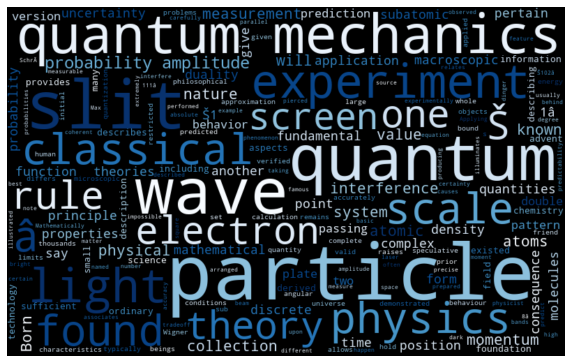

In [8]:
words1=''.join([text for text in data1_cleaned])
wordC=WordCloud(width=800,height=500,random_state=21,max_font_size=110,colormap="Blues").generate(words1)
plt.figure(figsize=(10,7))
plt.imshow(wordC,interpolation="bilinear")
plt.axis("off")
plt.show()

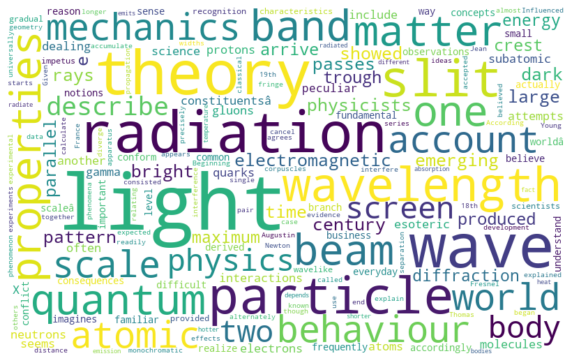

In [9]:
words2="".join([text for text in data2_cleaned])
wordC2=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color="white").generate(words2)
plt.figure(figsize=(10,7))
plt.imshow(wordC2,interpolation="bilinear")
plt.axis("off")
plt.show()

### 5. FuzzyWuzzy
FuzzyWuzzy is a library of Python which is used for string matching.One of the easiest ways of comparing text in python is using the fuzzy-wuzzy library. Here, we get a score out of 100, based on the similarity of the strings. Basically, we are given the similarity index. The library uses Levenshtein distance to calculate the difference between two strings.

In [10]:
# Importing the library
from fuzzywuzzy import fuzz

In [11]:
fuzz.ratio(data1_cleaned,data2_cleaned)

1

In [12]:
fuzz.partial_ratio(data1_cleaned,data2_cleaned)

1

### 6.Cosine Similarity
Cosine similarity measures the cosine of the angle between two vectors. Here vectors can be bag of words, TF-IDF, or Doc2Vec. Cosine similarity is best suitable for where repeated words are more important and can work on any size of the document. Its value ranges from 0 to 90 degrees, where 0 degree means the two documents are exactly identical and 90 degree means that the two documents are very different.

In [13]:
# Importing the libraries for feature extraction using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Importing cosine similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
docs=[data1_cleaned,data2_cleaned]
# Create TfidfVectorizer
tfidf=TfidfVectorizer()

In [15]:
# Fit and transform the documents
tfidf_vector=tfidf.fit_transform(docs)

In [16]:
# Calculate cosine similarity
cosine_sim=cosine_similarity(tfidf_vector,tfidf_vector)

In [17]:
print(cosine_sim)

[[1.         0.81858951]
 [0.81858951 1.        ]]


### 7. Jaccard Similarity
Jaccard Similarity is the ratio of common words to total unique words or we can say the intersection of words to the union of words in both the documents.Its scores ranges between 0-1. 1 represents the higher similarity while 0 represents the no similarity. It considers only the unique set of words for each sentence and does not give importance to the duplication of words.

In [18]:
# Split the documents and create tokens
doc1_tokens=set(data1_cleaned.lower().split())
doc2_tokens=set(data2_cleaned.lower().split())

In [19]:
# print the tokens
print(doc1_tokens,doc2_tokens)

{'probabilities', 'between', 'its', 'most', 'high', 'says', 'large', 'before', 'principle', '8â', 'predictability', 'measurable', '5', 'position', 'slit', 'function', 'born', 'each', 'time', 'and', 'momentum', 'probability', 'application', 'like', 'initial', 'many', 'point', 'behavior', 'be', 'form', 'has', 'basic', 'producing', 'via', 'allows', 'performed', 'valid', 'do', 'version', 'â', 'laser', 'dark', 'observed', 'given', 'furthermore', 'a', 'of', 'by', 'scale', 'calculation', 'include', 'complete', 'through', 'towards', 'subatomic', 'coherent', 'human', 'feature', 'as', 'systems', 'nature', 'waves', 'atomic', 'conditions', 'values', 'complex', 'in', 'remains', 's', 'pattern', 'approximation', 'properties', 'sufficient', 'tradeoff', 'entities', 'one', 'uncertainty', 'precise', 'illustrated', 'describing', 'set', 'which', 'discrete', 'small', 'ordinary', 'verified', 'accuracy', 'absolute', 'atoms', 'consequence', 'when', 'known', 'impossible', 'with', 'taking', 'but', 'passes', 'hav

In [20]:
# Calculating the Jaccard Similarity
jaccard_similarity=len(doc1_tokens.intersection(doc2_tokens))/len(doc1_tokens.union(doc2_tokens))

In [21]:
#printing the Jaccard Similarity score
print(jaccard_similarity)

0.2163355408388521


#### These measures are not all the same thing and they yield quite different results. Yet they are all types of distances, ways of describing the relationship between two data samples. 